# Project: Investigate a Dataset - [No_Show_Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

   
- **"ScheduledDay"** tells us on what day the patient set up their appointment.

- **"Neighborhood"** indicates the location of the hospital.

- **"Scholarship"**  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>**Tip**: Be careful about the encoding of the last column: it says **‘No’** if the patient showed up to their appointment, and **‘Yes’** if they did not show up.

### Question(s) for Analysis
<ul>
    <li><a href= "#0"> What factors will affect on the attendance of patients? </a></li>
    <li><a href= "#1"> Research Question 1 (How many patients have Diabetes  for each gender with no_show status?) </a></li>
    <li><a href= "#2"> Research Question 2  (How many patients have Hipertension for each gender with the no_show status?) </a></li>
    <li><a href= "#3"> Research Question 3 (How many patients are alcoholism for each gender with no_show status?) </a></li>
    <li><a href= "#4"> Research Question 4 (How many patients have Handcap for each gender with no_show status?) </a></li>
    <li><a href= "#5"> Research Question 5 ( How many patients have been received SMS for each gender with no_show status?) </a></li>
    <li><a href= "#6"> Research Question 6 (How many patients have scholarship for each gender with no_show status?) </a></li>
    <li><a href= "#7"> Research Question 7 (does neighbourhood affect on no_show status?) </a></li>
    <li><a href= "#8"> Research Question 8 (does age in each neighbourhood affect on no_show status?) </a></li>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [3]:
# Loading data and print out a few lines. Performing operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no-show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


***

> we will remove unneeded first 5 columns except **"Gender"** column.  

***

In [4]:
# knowing the no. of rows and columns in the dataset
df.shape

(110527, 14)

___

> ###### There are 110,527 patients and 14 features.

***

In [5]:
# get some statistics to know more about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


___


>**•** the average of the age is 37 years old, 50% of the patient's age is between 18 and 55 years old.
>
>**Issue #1**
>    
>**•** there is something inconvenient like (min of age is: -1)!.

***

In [6]:
# masking for determining how many rows have " Age == -1"
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


***

>######  WELL, we will drop this row later on cleaning data section.

___

In [7]:
# showing whether the dataset contains duplicated values or not.
df.duplicated().sum()

0

---

> **GREAT**, there are no duplicated rows.

---

In [8]:
# showing whether the dataset has NULL values or not.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

---

> **GREAT**, there are no rows contain **"NULL"** values.

---

In [9]:
# showing the data-types of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
# showing whether if all the patients are unique or there are more record for the same patient
# (check for unique values)
df['PatientId'].nunique()

62299

---

>###### That's mean there are 48,228 patients have more than one reservation.
(to insure that let's see duplicated values **in the next cell**)

---

In [11]:
# let's see how many duplicated record for the patients.
df['PatientId'].duplicated().sum()

48228

---

> ###### still normal duplication because maybe these patients have more than one reservation as long as the cure need that.

---

In [12]:
# determining whether if those patients have the same status in "No-show" column or not with the same age.
df.duplicated(['PatientId', 'Age', 'No-show']).sum()

37758

---

> **Issue #2**
>
> **WELL**, we will drop these rows.

---


### Data Cleaning

In [13]:
# let's fixing some mistakes in columns names.
df.rename(columns= lambda x : x.lower(), inplace=True)
df.rename(columns={'no-show':'no_show'}, inplace=True)

In [14]:
# for insuring if changes are made or not.
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [15]:
# fixing Issue #1, Dropping the row which contains Age == -1.
df.drop(df.query("age == -1").index, inplace=True)

In [16]:
# let's insure what we have done before.
df.query("age == -1")

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


---

> **WELL** !

---

In [17]:
# fixing Issue #2.
df.drop_duplicates(['patientid', 'age', 'no_show'], inplace=True)
df.shape

(72768, 14)

---

> now we have **72,768** from **110,527** rows.

---

In [18]:
# let's drop some columns that we don't need them in our analysis
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)
df.head(2)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [19]:
df.shape

(72768, 10)

---

> now we have 72,768 rows and 10 columns

---

<a id='eda'></a>
## Exploratory Data Analysis

In [20]:
def histogram(column):
    """take one parameter (column or dataframe) and Show histogram of it"""
    column.hist(figsize= (14,8), color='#065457', alpha=0.6, grid= True);


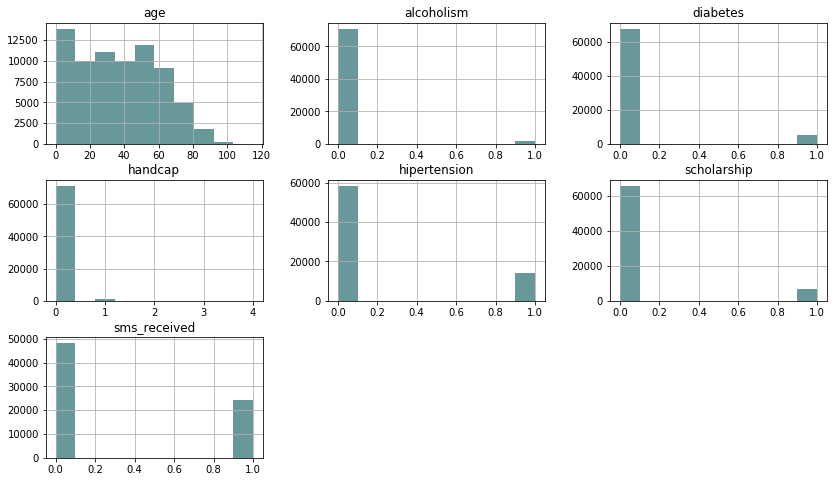

In [21]:
# let's see quick overview for whole dataset 
histogram(df)

<a id="0"></a>
## What factors will affect on the attendance of patients? 

In [22]:
female = df.gender == 'F'
male = df.gender == 'M'

---

> making mask to split our dataset into female and male.

---

In [23]:
# let's make function to avoid repetitive code.
def bar(first_col, sec_col, third_col, f_color='#455457', s_color='#45a457'):
    """Do subplot from two bar charts."""
    plt.figure(figsize=(12,5))
    df[female].groupby([first_col, sec_col])[third_col].value_counts().plot(kind='bar', alpha=0.5, color=f_color, label='FEMALE');
    df[male].groupby([first_col, sec_col])[third_col].value_counts().plot(kind= 'bar', alpha=0.5, color=s_color, label='MALE');
    plt.title('The correlation between GENDER, '+ sec_col.replace("_", "").upper() +' and ' + third_col.replace("_", "").upper(), fontsize=10)
    plt.xlabel("("+first_col+','+sec_col+ ',' + third_col + ')', fontsize=12)
    plt.ylabel("No. of patients", fontsize=12)
    plt.legend();

In [24]:
# 
def value_count(first_col, second_col, third_col):
    """return counts of some columns using groupby."""
    print(df.groupby([first_col, second_col])[third_col].value_counts().reset_index(name="number of patients"))

---

> Remember that **"NO"** in **no_show** column means that patients have been shown and **"YES"** means that they are didn't show.

---

<a id="1"></a>
### Research Question 1 (How many patients have Diabetes  for each gender with no_show status?)

  gender  diabetes no_show  number of patients
0      F         0      No               32719
1      F         0     Yes               10805
2      F         1      No                2807
3      F         1     Yes                 801
4      M         0      No               18220
5      M         0     Yes                5842
6      M         1      No                1220
7      M         1     Yes                 354


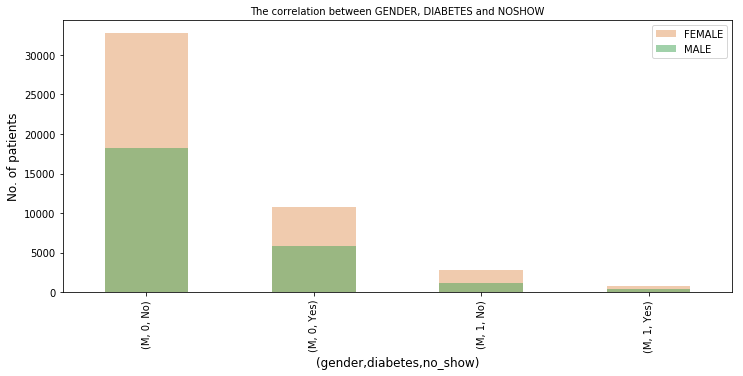

In [25]:
# let's see how many patients have Diabetes for each gender.
bar('gender', 'diabetes', 'no_show', f_color='#e2985f')
value_count('gender', 'diabetes', 'no_show');

---

> The number of females who didn't have diabetes and attend is bigger than who have diabetes and attend. The same thing for males too, so we can understand that the diabetes doesn't affect the attendance.

---

<a id="2"></a>
### Research Question 2  (How many patients have Hipertension for each gender with the no_show status?)

  gender  hipertension no_show  number of patients
0      F             0      No               27687
1      F             0     Yes                9475
2      F             1      No                7839
3      F             1     Yes                2131
4      M             0      No               16084
5      M             0     Yes                5289
6      M             1      No                3356
7      M             1     Yes                 907


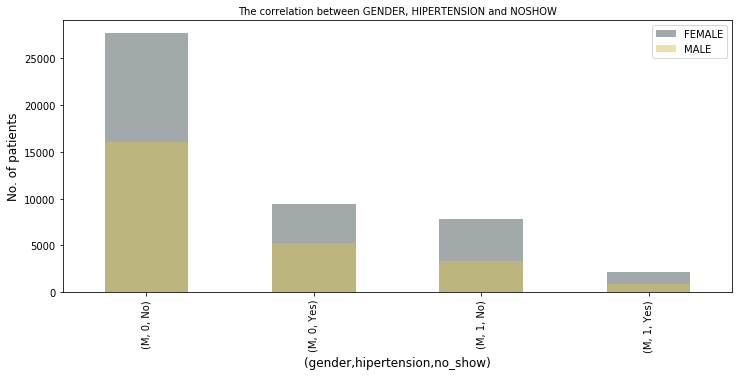

In [26]:
# let's see how many patients have Hipertension for each gender.
bar('gender', 'hipertension', 'no_show', s_color='#d8c454')
value_count('gender', 'hipertension', 'no_show')

---

> The number of females who didn't have hipertension and attend is bigger than who have hipertension and attend. The same thing for males too, so we can understand that the hipertension doesn't affect the attendance.

---

<a id="3"></a>
### Research Question 3 (How many patients are alcoholism for each gender with no_show status?)

  gender  alcoholism no_show  number of patients
0      F           0      No               35044
1      F           0     Yes               11369
2      F           1      No                 482
3      F           1     Yes                 237
4      M           0      No               18622
5      M           0     Yes                5909
6      M           1      No                 818
7      M           1     Yes                 287


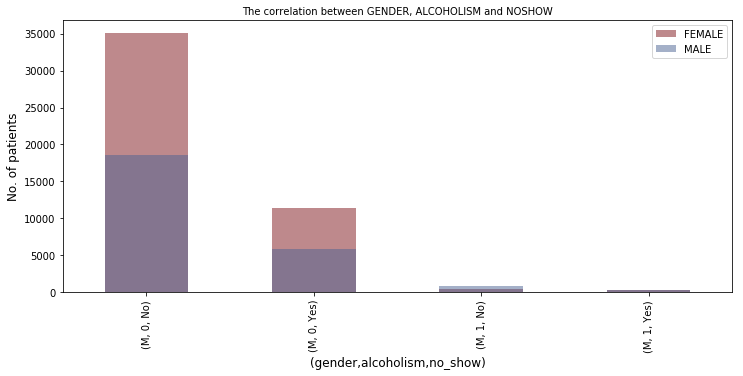

In [27]:
# let's see how many patients have alcoholism for each gender.
bar('gender', 'alcoholism', 'no_show', s_color='#4b6293', f_color='#7F151A')
value_count('gender', 'alcoholism', 'no_show')

---

> The number of females who aren't alcoholic and attend is bigger than who are alcoholic and attend. The same thing for males too, so we can understand that the alcoholic doesn't affect the attendance.

---

<a id ="4" ></a>
### Research Question 4 (How many patients have Handcap for each gender with no_show status?)

   gender  handcap no_show  number of patients
0       F        0      No               34941
1       F        0     Yes               11442
2       F        1      No                 537
3       F        1     Yes                 147
4       F        2      No                  47
5       F        2     Yes                  16
6       F        3      No                   1
7       F        4     Yes                   1
8       M        0      No               18977
9       M        0     Yes                6079
10      M        1      No                 413
11      M        1     Yes                 103
12      M        2      No                  44
13      M        2     Yes                  11
14      M        3      No                   4
15      M        3     Yes                   3
16      M        4      No                   2


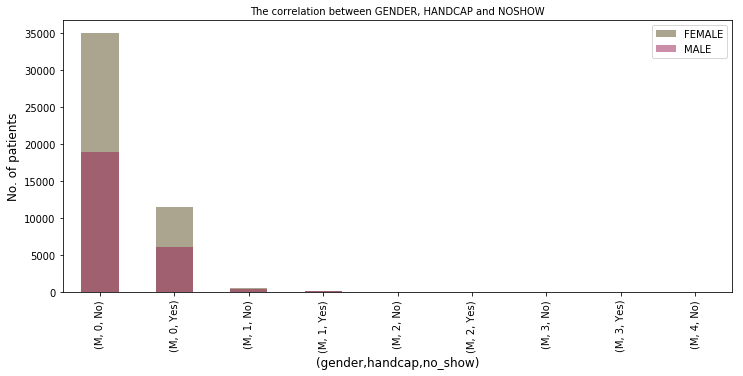

In [28]:
# let's see how many patients have Handcap for each gender.
bar('gender', 'handcap', 'no_show', s_color='#961e52', f_color='#594a1e')
value_count('gender', 'handcap', 'no_show')

---

> The number of females who didn't have handcap and attend is bigger than the number of females who have handcap and show. The same thing for males, so we can understand from this that the handcap didn't affect attendance.

---

<a id ="5" ></a>
### Research Question 5 ( How many patients have been received SMS for each gender with no_show status?)

  gender  sms_received no_show  number of patients
0      F             0      No               24556
1      F             0     Yes                6134
2      F             1      No               10970
3      F             1     Yes                5472
4      M             0      No               14021
5      M             0     Yes                3592
6      M             1      No                5419
7      M             1     Yes                2604


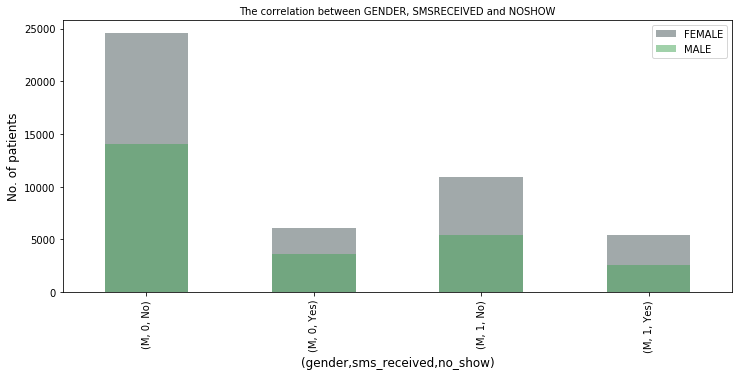

In [29]:
# let's see How many patients have been received SMS for each gender?.
bar('gender','sms_received', 'no_show')
value_count('gender', 'sms_received', 'no_show')

---

> The number of females who didn't receive SMS and show is bigger than the number of females who recieved SMS and show. The same thing for males, so we can understand that the SMS doesn't affect attendance.

---

<a id ="6" ></a>
### Research Question 6 ( How many patients have scholarship for each gender with no_show status?)

  gender  scholarship no_show  number of patients
0      F            0      No               31430
1      F            0     Yes               10013
2      F            1      No                4096
3      F            1     Yes                1593
4      M            0      No               18508
5      M            0     Yes                5856
6      M            1      No                 932
7      M            1     Yes                 340


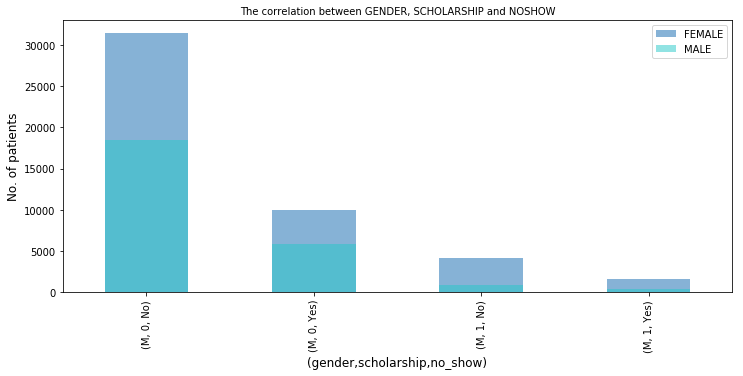

In [30]:
bar('gender','scholarship', 'no_show', f_color='#0e67af', s_color='#24c9c9')
value_count('gender', 'scholarship', 'no_show')

---

> The number of females who haven't scholarship and show is bigger than the number of females who have scholarship and show. The same thing for males, so we can understand that the enrollment in Brasilian welfare program Bolsa Família. doesn't affect attendance.

---

<a id ="7" ></a>
### Research Question 7 ( does neighbourhood affect on no_show status?)

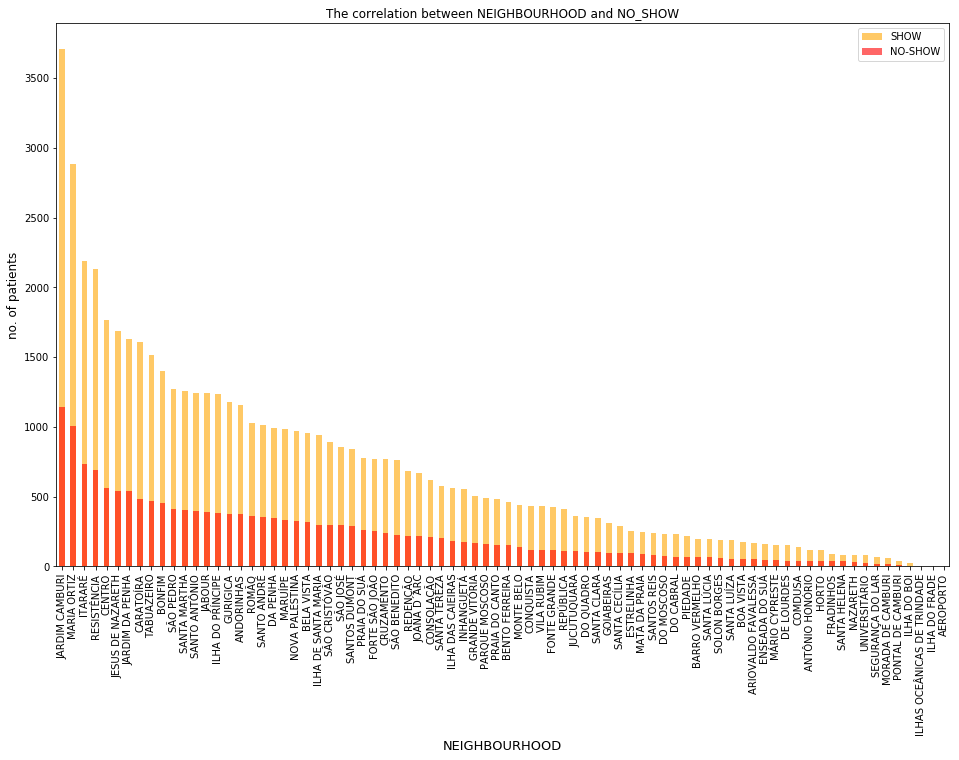

In [31]:
# let's split the data to show and no-show to figure out clearly the correlation between 'neighbourhood' column and no_show column.
show = df.no_show == 'No'
noShow = df.no_show == 'Yes'
plt.figure(figsize=(16,10))
df['neighbourhood'][show].value_counts().plot(kind='bar', alpha=0.6, color='orange', label= 'SHOW')
df.neighbourhood[noShow].value_counts().plot(kind='bar', alpha=0.6, color='red', label= "NO-SHOW")
plt.legend()
plt.title('The correlation between NEIGHBOURHOOD and NO_SHOW', fontsize=12)
plt.xlabel("NEIGHBOURHOOD", fontsize=13)
plt.ylabel("no. of patients", fontsize=12);

---

> The **NEIGHBOURHOOD** clearly affect on no-show status. 
>
> **JARDIM CAMBURI** has the greatest number of patients and have the greatest number of patients who attend.
---

<a id ="8" ></a>
### Research Question 8 ( does age in each neighbourhood affect on no_show status?)

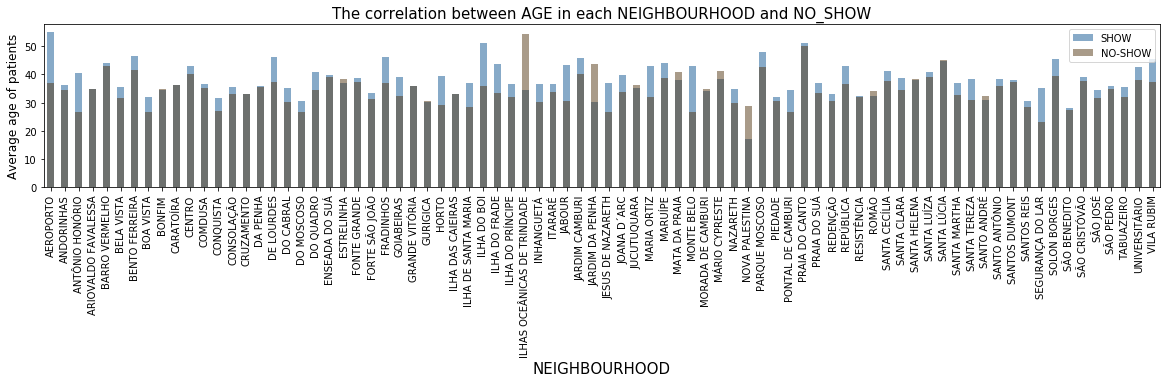

In [32]:
plt.figure(figsize=(20,3))
df[show].groupby('neighbourhood').age.mean().plot(kind='bar', alpha=0.5, color='#105693', label= 'SHOW')
df[noShow].groupby('neighbourhood').age.mean().plot(kind='bar', alpha=0.5, color='#543815', label= "NO-SHOW")
plt.legend()
plt.title('The correlation between AGE in each NEIGHBOURHOOD and NO_SHOW',fontsize=15)
plt.xlabel("NEIGHBOURHOOD", fontsize=15)
plt.ylabel("Average age of patients", fontsize=12);

---

> the mean of ages for those who attend is bigger than the mean of ages for those who didn't.
> 
> **AEROPORTO** and **ILHA DO BOI** have the highest average age of attendance, respectively, and **ILHAS OCEANICAS DE TRINDANDE** has highest average age of absence 
>
> so we can understand that the number of who attend from each **neighbourhood** is affected by age.
---

<a id='conclusions'></a>
## Conclusions

>  - The number of females are greater than the number of males.
>  - The average age of the patients was 37 years, most were under that age and there is one have 115 years.
>  - The most attendance was from females.
>  - most of patients didn't recieve SMS.
>  - most of patients who attend didn't recieve SMS.
>  - most of patients don't have (chronic diseases) or even handcap.
>  - the number of who attend from each neighbourhood is affected by age.
>  - There are no relation between diabetes, alcoholic,... etc (chronic disease) and no_show status.

### Limitations
> there is no clear correlation between no_show and chronic diseases, enrollment in Brasilian welfare program Bolsa Família.

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0